## Interleaving

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory where the CSV files are stored
directory_path = 'data'

# Delete old merged_result.csv file
if os.path.exists(directory_path + '/merged.csv'):
    os.remove(directory_path + '/merged.csv')
    print("Cleared merged.csv file")

# Merge all CSV files in the directory
def merge_all_csv_files(directory):
    all_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    merged_df = pd.concat([pd.read_csv(os.path.join(directory, file), sep=';') for file in all_files])
    return merged_df

merged_df = merge_all_csv_files(directory_path)

# Save the merged dataframe to a new CSV file
merged_df.to_csv(os.path.join(directory_path, 'merged.csv'), index=False, sep=';')
print("The files were successfully merged: 'merged.csv'.")


The files were successfully merged: 'merged.csv'.


## Rate of interleaving with no spacing

The average number of messages per conversation is: 4.00


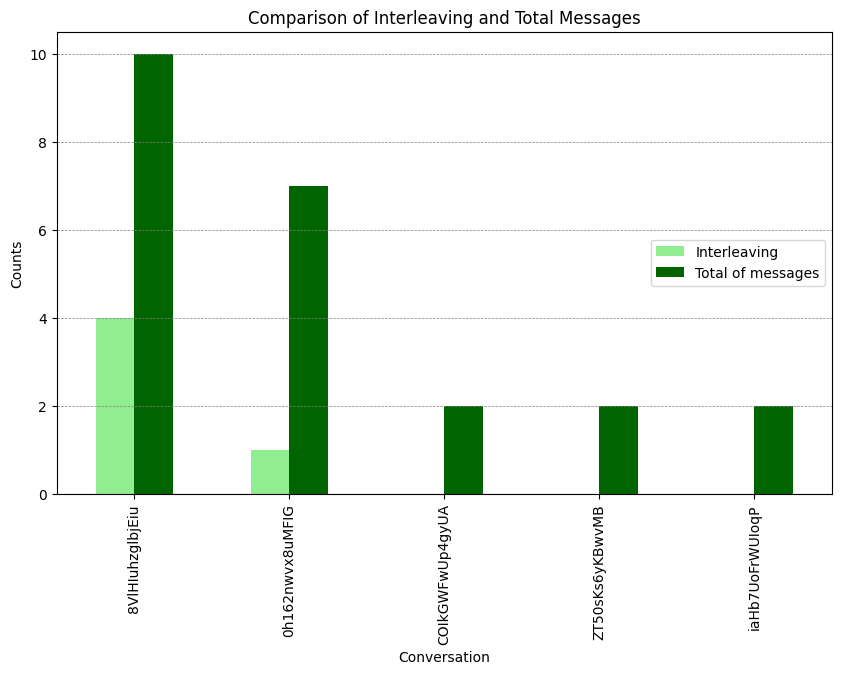

----
The total number of conversations without spacing: 5
The number of conversations with interleave: 2
The number of conversations blocked: 3


In [13]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Load the merged CSV file into a DataFrame
df = pd.read_csv('data/merged.csv', sep=';')

# Convert 'Datetime' column to datetime using the correct format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%H:%M:%S - %d/%m/%Y', errors='coerce')

# Filter the DataFrame to only include rows where 'Role' column is 'User'
df = df[df['Role'] == 'User']

# Calculate time differences between each message for each user
df['TimeDelta'] = df.groupby('Id')['Datetime'].diff().fillna(pd.Timedelta(seconds=0))
df['TimeDeltaMinutes'] = df['TimeDelta'].dt.total_seconds() / 60  # Convert to minutes

# Calculate time differences the first and the last message for each user
df['TimeDeltaFirstLast'] = df.groupby('Id')['Datetime'].transform(lambda x: x.max() - x.min())

# Remove rows where the 'Change' column is missing
df = df.dropna(subset=['Change'])

# Remove conversations where there is at least one record with TimeDeltaMinutes > 60
ids_to_remove = df[df['TimeDeltaMinutes'] > 60]['Id'].unique()
df = df[~df['Id'].isin(ids_to_remove)]

# save the DataFrame to a new CSV file
#df.to_csv('data/interleaving_nospacing.csv', index=False, sep=';')

# Count the number of 'Yes' in the 'Change' column for each unique 'Id'
yes_counts = df[df['Change'] == 'Yes'].groupby('Id').size()

# Count the total number of messages for each unique 'Id'
total_messages_counts = df.groupby('Id').size()

# Combine the counts into a single DataFrame
comparison_df = pd.DataFrame({
    'Yes Counts': yes_counts,
    'Total Messages': total_messages_counts
}).fillna(0)

# Sort the DataFrame by 'Total Messages' in descending order
comparison_df = comparison_df.sort_values(by='Total Messages', ascending=False)

# Average number of messages per conversation
average_messages_nospacing = comparison_df['Total Messages'].mean()
print(f'The average number of messages per conversation is: {average_messages_nospacing:.2f}')

# Remove rows where 'Total Messages' is 1
comparison_df = comparison_df[comparison_df['Total Messages'] > 1]

if yes_counts.empty:
    print("No Interleaving in conversations with no spacing")
else:
    # Plot the results with combined bars in shades of green
    ax = comparison_df.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'darkgreen'])
    plt.xlabel('Conversation')
    plt.ylabel('Counts')
    plt.title('Comparison of Interleaving and Total Messages')
    plt.legend(['Interleaving', 'Total of messages'])
    ax.yaxis.set_major_locator(plt.MultipleLocator(2))  # Ensure Y-axis has even integer ticks starting from 0
    ax.set_ylim(bottom=0)  # Ensure Y-axis starts from 0
    ax.axhline(y=0, color='gray', linewidth=0.8)  # Add a horizontal gray line at y=0

    # Add dashed gray lines at each y-tick
    for tick in ax.get_yticks():
        ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

    plt.show()

# # Count the number of unique users
# unique_users = df['Id'].nunique()
# print(f'The number of unique conversations is: {unique_users}')

# # Count number of messages
# total_messages = df.shape[0]
# print(f'The total number of messages is: {total_messages}')

# # Count the total of interleave messages
# total_interleave = df[df['Change'] == 'Yes'].shape[0]
# print(f'The total number of interleave messages is: {total_interleave}')

# # % of interleave messages
# percentage_interleave = (total_interleave / total_messages) * 100
# print(f'The percentage of interleave messages is: {percentage_interleave:.2f}%')

print('----')

# Number total of conversations with yes counts comparison_df
total_conversations_without_spacing = comparison_df.shape[0]
print(f'The total number of conversations without spacing: {total_conversations_without_spacing}')

# Number of conversations with interleave
total_conversations_without_spacing_interleave = comparison_df[comparison_df['Yes Counts'] > 0].shape[0]
print(f'The number of conversations with interleave: {total_conversations_without_spacing_interleave}')

# Number total of conversations blocked (total - interleave)
conversations_blocked = total_conversations_without_spacing - total_conversations_without_spacing_interleave
print(f'The number of conversations blocked: {conversations_blocked}')




## Rate of interleaving with spacing

                 Yes Counts  Spacing Counts  Total Messages
Id                                                         
xePvKOORNYJAmJ2           2               1               5


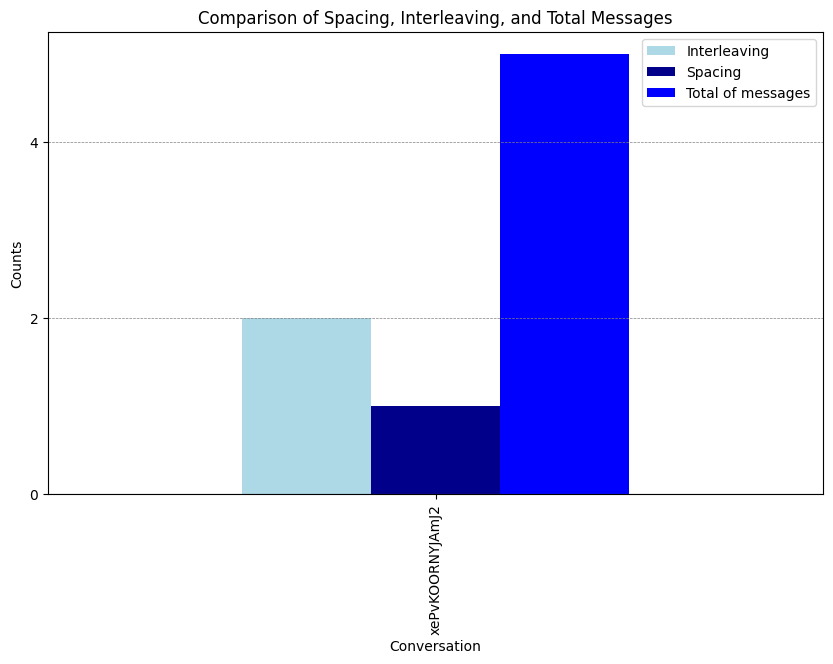

The total number of conversations with spacing: 1
The number of conversations with interleave: 1


In [14]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Load the merged CSV file into a DataFrame
df = pd.read_csv('data/merged.csv', sep=';')

# Convert 'Datetime' column to datetime using the correct format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%H:%M:%S - %d/%m/%Y', errors='coerce')

# Filter the DataFrame to only include rows where 'Role' column is 'User'
df = df[df['Role'] == 'User']

# Calculate time differences between each message for each user
df['TimeDelta'] = df.groupby('Id')['Datetime'].diff().fillna(pd.Timedelta(seconds=0))
df['TimeDeltaMinutes'] = df['TimeDelta'].dt.total_seconds() / 60  # Convert to minutes

# Remove rows where the 'Change' column is missing
df = df.dropna(subset=['Change'])

# Keep only conversations where there is at least one record with TimeDeltaMinutes > 60
ids_to_keep = df[df['TimeDeltaMinutes'] > 60]['Id'].unique()
df = df[df['Id'].isin(ids_to_keep)]

# save the DataFrame to a new CSV file
#df.to_csv('data/interleaving_spacing.csv', index=False, sep=';')

# Count the number of 'Yes' in the 'Change' column for each unique 'Id'
yes_counts = df[df['Change'] == 'Yes'].groupby('Id').size()

# Count the number of messages with TimeDeltaMinutes > 60 for each unique 'Id'
spacing_counts = df[df['TimeDeltaMinutes'] > 60].groupby('Id').size()

# Count the total number of messages for each unique 'Id'
total_messages_counts = df.groupby('Id').size()

# Combine the counts into a single DataFrame
comparison_df = pd.DataFrame({
    'Yes Counts': yes_counts,
    'Spacing Counts': spacing_counts,
    'Total Messages': total_messages_counts
}).fillna(0)

# Average messages per conversation
average_messages_spacing = (comparison_df['Total Messages']/(comparison_df['Spacing Counts'] + 1)).mean()

# print comparation_df
print(comparison_df)

# Sort the DataFrame by 'Total Messages' in descending order
comparison_df = comparison_df.sort_values(by='Total Messages', ascending=False)
# Plot the results with combined bars in shades of blue
ax = comparison_df.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'darkblue', 'blue'])
plt.xlabel('Conversation')
plt.ylabel('Counts')
plt.title('Comparison of Spacing, Interleaving, and Total Messages')
plt.legend(['Interleaving', 'Spacing', 'Total of messages'], loc='upper right')
ax.yaxis.set_major_locator(plt.MultipleLocator(2))  # Ensure Y-axis has even integer ticks starting from 0
ax.set_ylim(bottom=0)  # Ensure Y-axis starts from 0
ax.axhline(y=0, color='gray', linewidth=0.8)  # Add a horizontal gray line at y=0

# Add dashed gray lines at each y-tick
for tick in ax.get_yticks():
    ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

plt.show()

# Number total of conversations with spacing
total_conversations_with_spacing = comparison_df.shape[0]
print(f'The total number of conversations with spacing: {total_conversations_with_spacing}')

# Number of conversations with interleave
total_conversations_with_spacing_interleave = comparison_df[comparison_df['Yes Counts'] > 0].shape[0]
print(f'The number of conversations with interleave: {total_conversations_with_spacing_interleave}')




In [15]:

# Number total of conversations with yes counts comparison_df
print(f'The total number of conversations without spacing: {total_conversations_without_spacing}')

# Number of conversations with interleave
print(f'The number of conversations with interleave: {total_conversations_without_spacing_interleave}')

# Number total of conversations blocked (total - interleave)
print(f'The number of conversations blocked: {conversations_blocked}')

# Number total of conversations with spacing
print(f'The total number of conversations with spacing: {total_conversations_with_spacing}')

# Number of conversations with interleave
print(f'The number of conversations with space and interleave: {total_conversations_with_spacing_interleave}')

print('----')
print('----')

# Total of conversations
print(f'Total of conversations: {total_conversations_without_spacing + total_conversations_with_spacing}')

# % of conversations with interleave (blocked or not)
percentage_interleave = (total_conversations_without_spacing_interleave + total_conversations_with_spacing_interleave) * 100 / (total_conversations_without_spacing + total_conversations_with_spacing)
print(f'Conversations with interleave: {percentage_interleave:.2f}%')

# % of conversations of blocked
percentage_blocked = conversations_blocked * 100 / (total_conversations_without_spacing + total_conversations_with_spacing)
print(f'Conversations blocked: {percentage_blocked:.2f}%')

# % of conversations with spaced only
percentage_spaced_only = (total_conversations_with_spacing - total_conversations_with_spacing_interleave) * 100 / (total_conversations_without_spacing + total_conversations_with_spacing)
print(f'Conversations with spacing only: {percentage_spaced_only:.2f}%')

# % of conversations with spaced
percentage_spaced = total_conversations_with_spacing * 100 / (total_conversations_without_spacing + total_conversations_with_spacing)
print(f'Total of conversations with spacing: {percentage_spaced:.2f}%')


# % of conversations with space and interleave
percentage_spaced_interleave = percentage_spaced - percentage_spaced_only
print(f'Conversations with space and interleave: {percentage_spaced_interleave:.2f}%')

print('----')
print('----')

# Average message per blocked session

# Average messages per conversation without spacing
print(f'The average messages per session without spacing is: {average_messages_nospacing:.2f}')

# Average messages per conversation with spacing
print(f'The average messages per session with spacing is: {average_messages_spacing:.2f}')

average_messages = (average_messages_nospacing + average_messages_spacing)/2
print(f'The average number of messages per blocked session is: {average_messages:.2f}')

# Standard deviation per conversation without spacing
std_dev = np.std([average_messages_nospacing, average_messages_spacing])
print(f'The standard deviation of the average messages per conversation is: {std_dev:.2f}')



The total number of conversations without spacing: 5
The number of conversations with interleave: 2
The number of conversations blocked: 3
The total number of conversations with spacing: 1
The number of conversations with space and interleave: 1
----
----
Total of conversations: 6
Conversations with interleave: 50.00%
Conversations blocked: 50.00%
Conversations with spacing only: 0.00%
Total of conversations with spacing: 16.67%
Conversations with space and interleave: 16.67%
----
----
The average messages per session without spacing is: 4.00
The average messages per session with spacing is: 2.50
The average number of messages per blocked session is: 3.25
The standard deviation of the average messages per conversation is: 0.75


## Topics

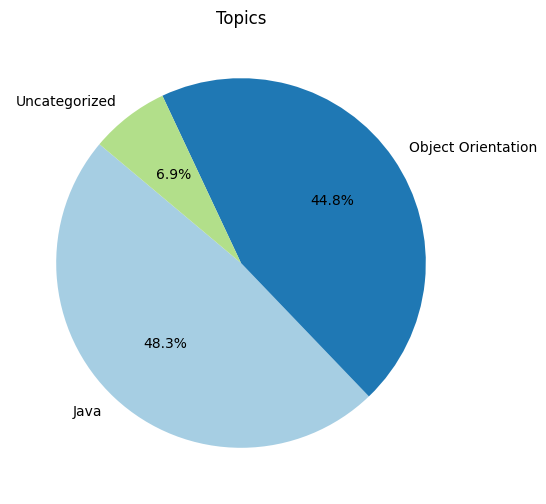

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file into a DataFrame
df = pd.read_csv('data/merged.csv', sep=';')

# Count the occurrences of each topic
topic_counts = df['Topic'].value_counts()

# Plot the pie chart with a single color palette
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(topic_counts)))  # Use the 'Paired' colormap
topic_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.ylabel('')  # Hide the y-label
plt.title('Topics')
plt.show()
